In [1]:
import pandas as pd

df = pd.read_csv("V21.txt",sep=",", names = ['time', 'signal 1', 'signal 2'])
# df.describe()

In [2]:
import numpy as np

def statanalize (selection):
    N = len(selection)
    sum = np.sum(selection)
    
#   среднее
    mid = sum / N
    print("Average: ", mid)
    
#   дисперсия
    d_sum = 0
    for i in range(N):
        d_sum = d_sum + (selection[i] - mid)**2
    Disp = d_sum/(N-1)
    print("Dispersion: ", Disp)
    
# гистограмма частот

    fig = plt.figure(figsize = (10, 5))
    plt.title("Histogram: ")
    plt.hist(selection)
    plt.show()
    
    return mid, Disp

In [3]:
from scipy import signal

import matplotlib.pyplot as plt

def autocorrelation(sig):
    autocorr = signal.fftconvolve(df[sig], df[sig][::-1], mode='full')
 
    
    fig = plt.figure(figsize = (10, 5))
    plt.plot(np.arange(-len(df[sig])+1,len(df[sig])), autocorr)
    plt.title('Autocorrelation')
    plt.xlim(-1000, 1000)

    plt.show()

In [4]:
from scipy import signal

def spectr(sig):
    freqs, psd = signal.welch(df[sig])

    plt.figure(figsize = (7, 5))
    plt.semilogx(freqs, psd)
    
    plt.title("PSD: power spectral density")
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.tight_layout()
    plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def Fourier_transform(sig):
    fou = np.fft.fft(df[sig])
    back_fou = np.fft.ifft(fou)

    fig = plt.figure(figsize = (10,5))
    plt.title("Fourier transform")
    plt.plot(df['time'], fou)
    plt.show()

    fig = plt.figure(figsize = (15,10))
    plt.plot(df['time'], df[sig], color = 'Red')
    plt.plot(df['time'], back_fou, color = 'lightblue')
    plt.show()

## Analize statictics of signal 1

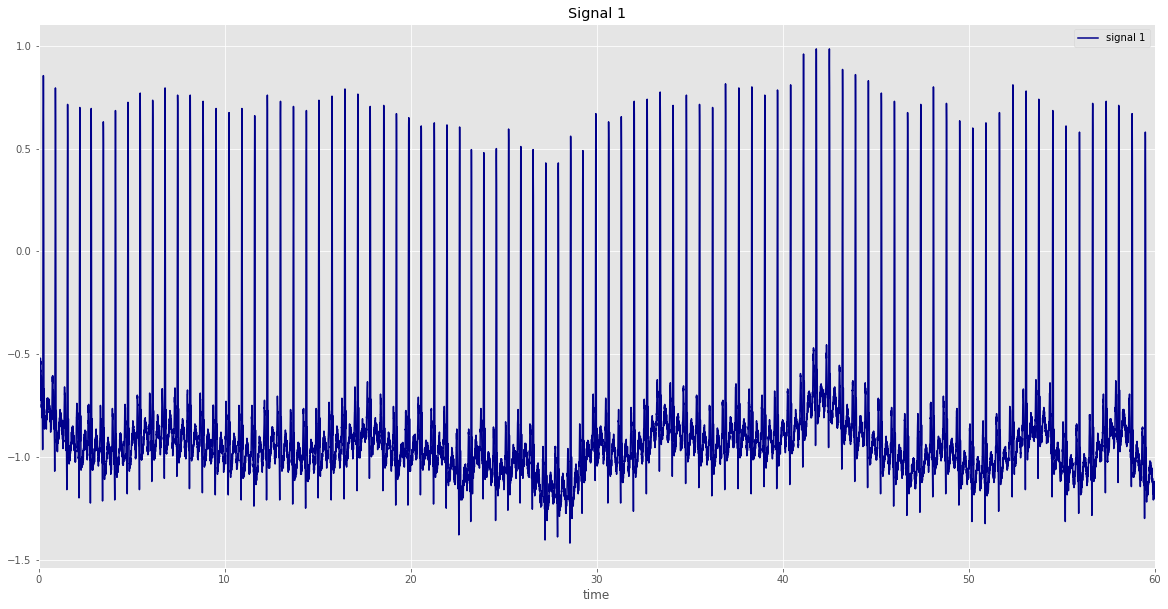

In [26]:
import matplotlib.pyplot as plt
df.plot(x='time', y = 'signal 1', figsize = (20,10), title = 'Signal 1', color = "darkblue")
plt.show()

Average:  -0.8628685185185184
Dispersion:  0.12429791965334495


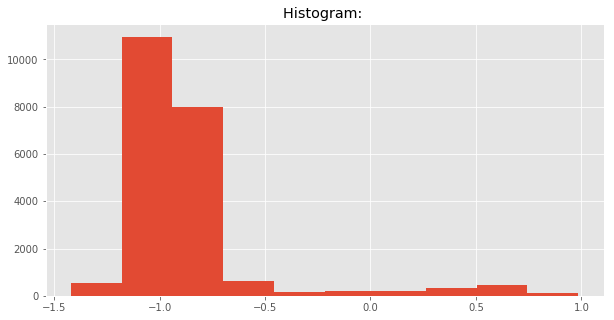

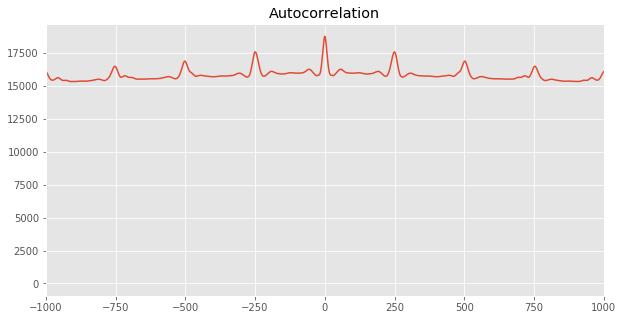

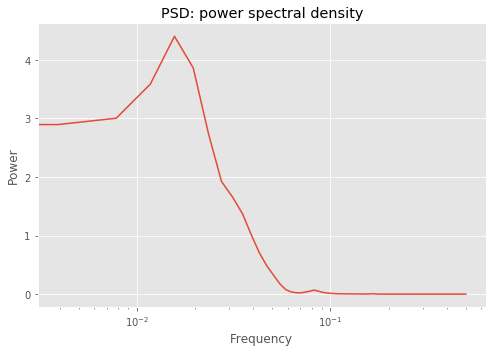

In [27]:
mid_signal1, disp_signal1 = statanalize(df['signal 1'])
autocorrelation('signal 1')
spectr ('signal 1')

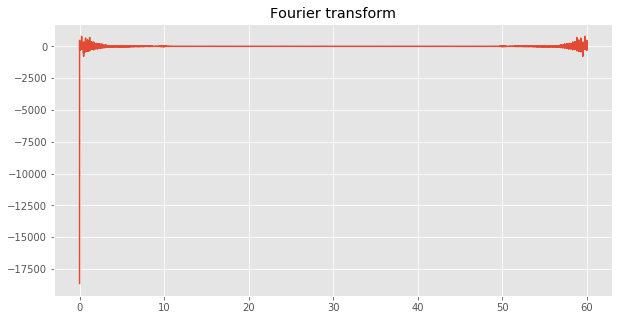

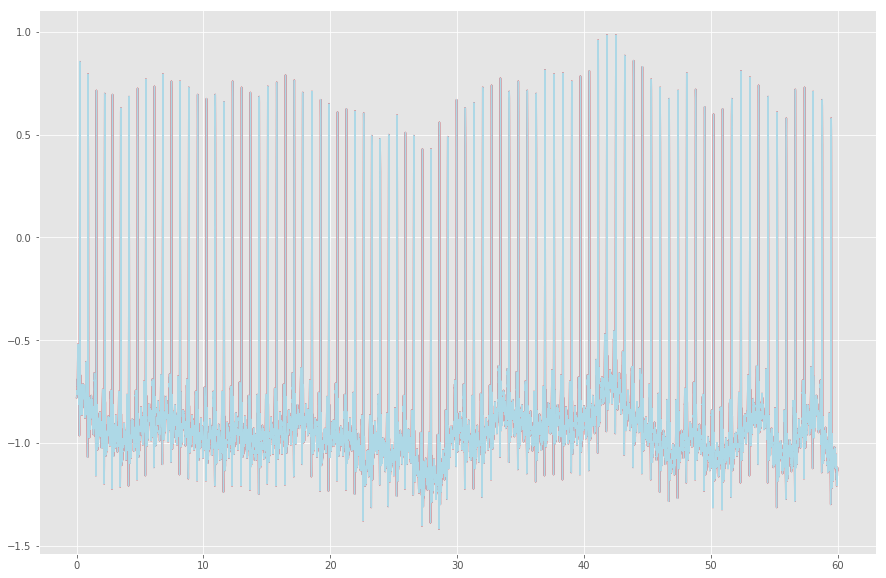

In [28]:
Fourier_transform ('signal 1')

## Analize statictics of signal 2

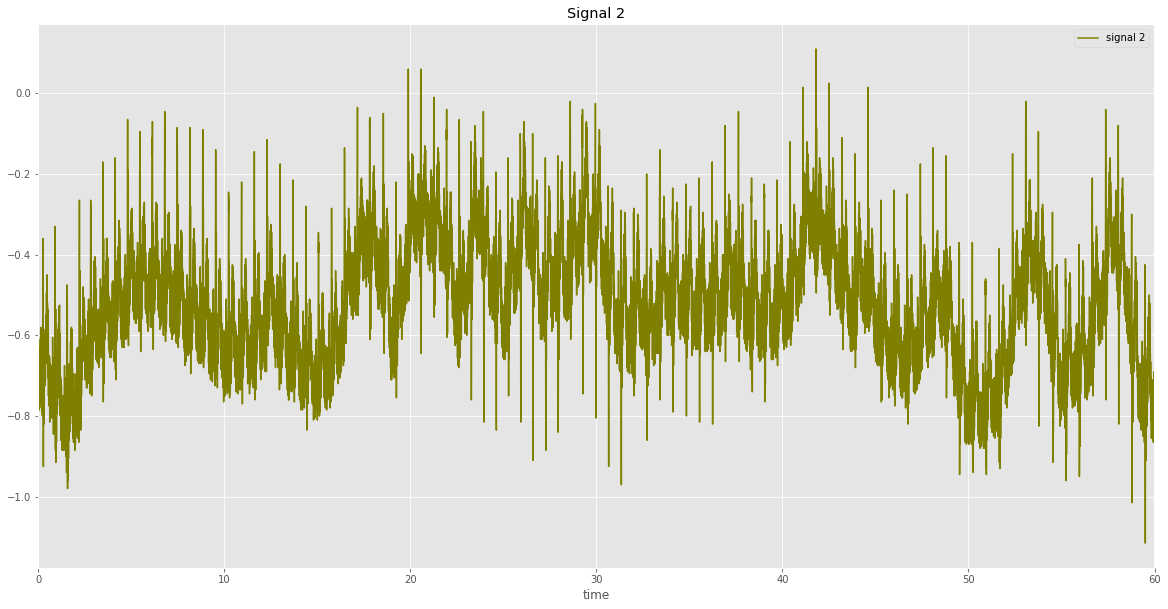

In [29]:
df.plot(x='time', y = 'signal 2', figsize = (20,10),title = 'Signal 2', color = 'olive')
plt.show()

Average:  -0.5151168981481482
Dispersion:  0.022509981009870436


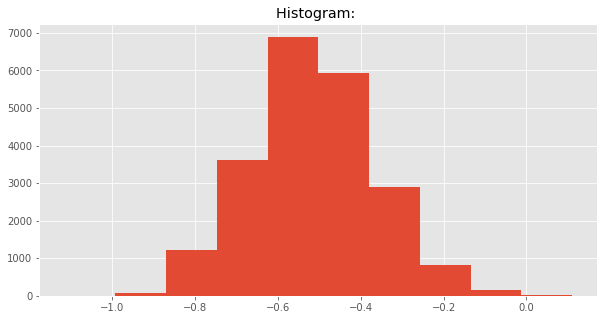

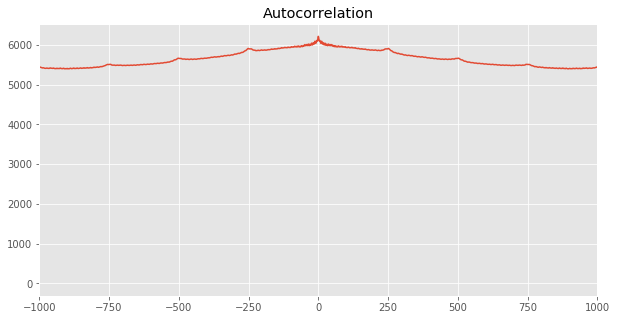

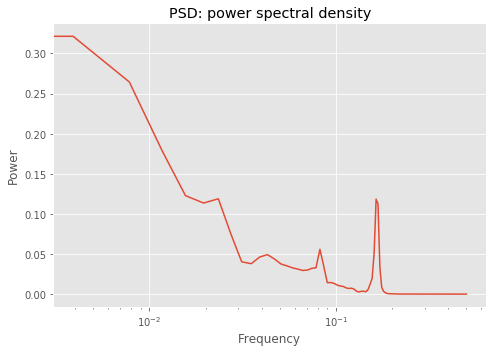

In [30]:
mid_signal2, disp_signal2 = statanalize(df['signal 2'])
autocorrelation('signal 2')
spectr ('signal 2')

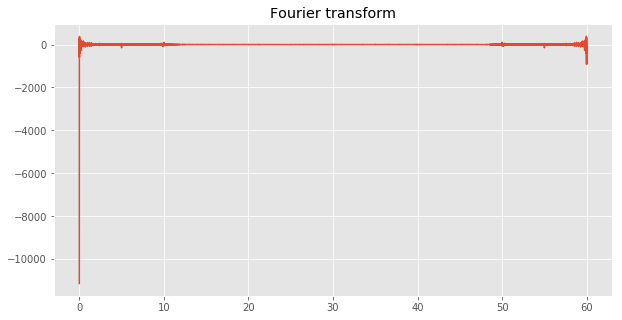

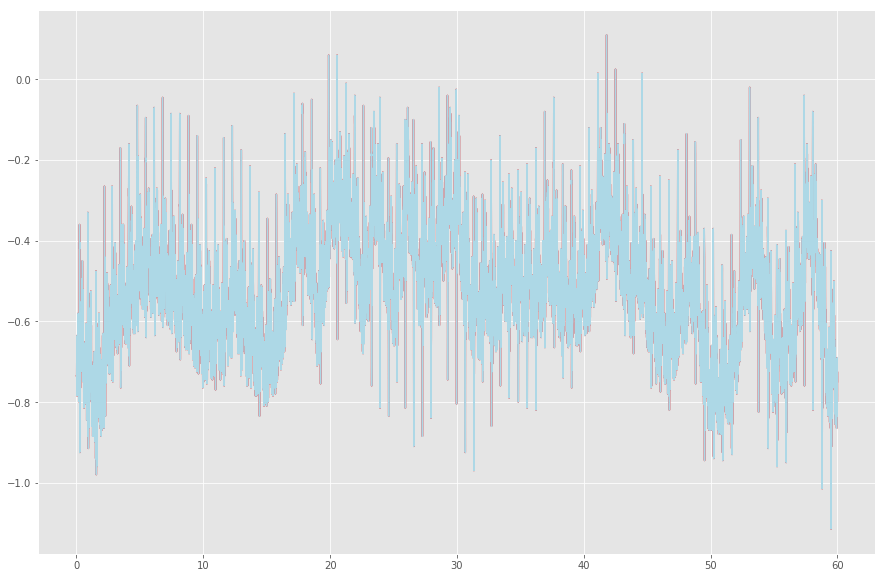

In [31]:
Fourier_transform ('signal 2')

## Сorrelation and regression
Checking correlation between signals. Secong signal is independent variable (x), first - dependent (y). 
Creating regression models. If correlation is low, use polynomial regression second degrees, otherwise, linear.

In [32]:
from scipy import stats

print(stats.pearsonr(df['signal 1'], df['signal 2']))
print(stats.spearmanr(df['signal 1'], df['signal 2']))

(0.17889973900342696, 8.408260132452528e-155)
SpearmanrResult(correlation=0.25485105570337085, pvalue=0.0)


Using coefficient Pirson (= 0.178), we see, then signals' dependenting is low.

Below on graphic showed function y = f(x).

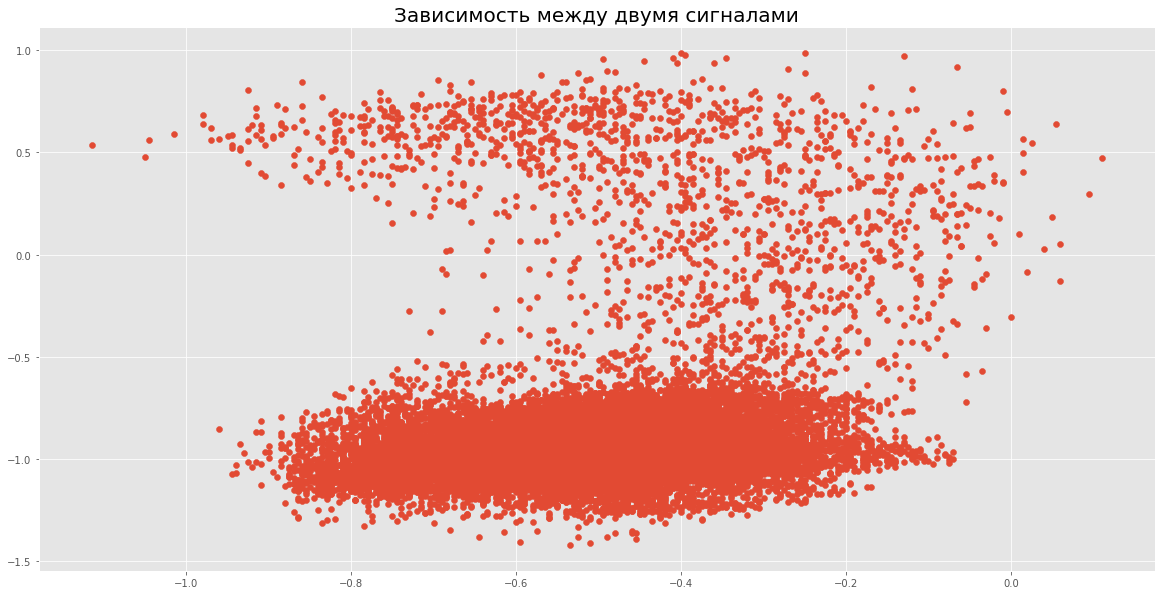

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

fig = plt.figure(figsize = (20, 10))
plt.title('Зависимость между двумя сигналами', size = 20)
plt.scatter(df['signal 2'], df['signal 1'])
plt.show()

Creating polynomial regression second degrees.

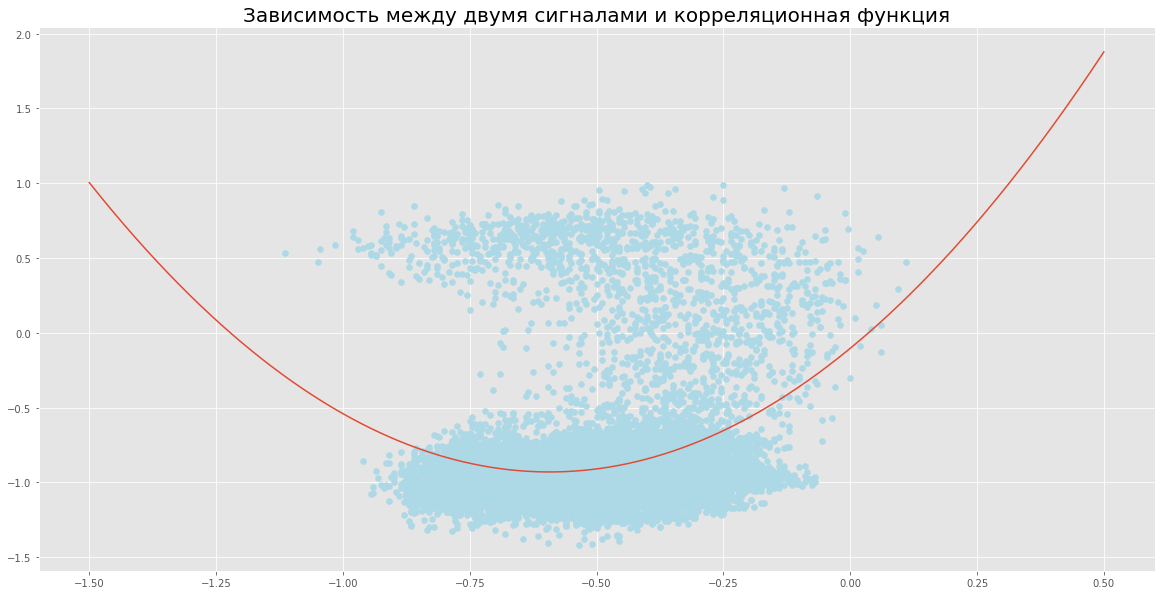

In [35]:
x = np.array(df['signal 2'])
y = np.array(df['signal 1'])
z = np.polyfit(x, y , 2)
f = np.poly1d(z)

gr_x = np.linspace(-1.5, 0.5, 21600)
gr_y = f(gr_x)

apr_y = f(x)

fig = plt.figure(figsize = (20, 10))
plt.title('Зависимость между двумя сигналами и корреляционная функция', size = 20)
plt.scatter(x, y, color = 'lightblue')
plt.plot(gr_x, gr_y)
plt.show()


### $$ y = 2.35x^2 + 2.787x - 0.1038 $$


In [36]:
sum1 = 0
sum2 = 0

for i in range(len(apr_y)):
    sum1 += pow(y[i] - apr_y[i], 2)
    sum2 += pow(y[i] - mid_signal1, 2)
    
R2 = sum1/sum2

m = 2
n = len(apr_y)

# k = n-m-1 = 
k2 = n - m -1  
# k = m число параметров при пременных уравнения регрессии (без свободного члена)
k1 = m
F_fact = (R2/(1-R2))

# уровень значимости l = 0.05 
F_test = 2.99

print("Коэффицент детерминации:", round(R2, 4), round(R2*100, 3), "%" )

if F_fact < F_test:
    print("Модель адекватна")

Коэффицент детерминации: 0.9232 92.316 %


Коэффициент демерминации показывает, что изменчивость у объясняется изменчивастью х на 92% 

In [37]:
import math

n = len(apr_y)

S = math.sqrt(sum1/(n-2))

sum3 = 0
for i in range(n):
    sum3 += pow(x[i] - mid_signal2,2)

Sx = math.sqrt((1/(n-1))*sum3)
 
# уровень значимости l = 0.05 
t_st = 1.96

Sa = S * math.sqrt((1/n) + (mid_signal2**2)/((n-1)*(Sx)**2))     
Sb = S / (Sx*math.sqrt(n-1))


if math.fabs(f[0]) > Sa *t_st:
    print("Коtф а значимый")
    
if math.fabs(f[1]) > Sa *t_st:
    print("Коеф b значимый")
      
if math.fabs(f[2]) >  Sb * t_st:
    print("Коеф c значимый")
      

Коtф а значимый
Коеф b значимый
Коеф c значимый


## Однофакторный анализ

In [38]:
import numpy as np
import random

# факторы
Ai = []
Ai.append(np.array(df['signal 1']))
Ai.append(np.array(df ['signal 2']))
Ai = np.array(Ai)

# среднее
Mi = []
Mi.append(mid_signal1)
Mi.append(mid_signal2)

# дисперсии
Si = []
Si.append(disp_signal1)
Si.append(disp_signal2)

k = 2
n = len(df['signal 1'])

def calculating_S0(a, m, d):
    sum = 0
    sum1 = 0
    for i in range(k):
        sum1 = sum1 + d[i] * (1/(k*(n-1)))
    for i in range(k):
        for j in range(n):
            sum = sum + ((a[i][j] - m[i])**2)
    S0 = (1 / k) * sum1 * sum
    return S0


def calculating_S(a):
    sum1 = 0
    sum2 = 0
    for i in range(k):
        for j in range(n):
            sum1 = sum1 + (a[i][j])**2
    for i in range(k):
        for j in range(k):
            sum2 = sum2 + a[i][j]
    S = (1/(k*n - 1)) * sum1 - (1/(k*n)*(sum2**2))
    return S



Mid = 0
for i in range (2):
    Mid = Mid + Mi[i]
Mid = Mid/2

S0 = calculating_S0(Ai, Mi, Si)
S = calculating_S(Ai)

sum = 0
for i in range(2):
    sum = sum + (Mi[i] - Mid)**2
S_a = (n/(k-1))*sum

# print("Выборочная дисперсия всех наблюдений:", S)
print("Внешняя дисперсия: ", S0)
print("Внутреняя дисперсия:", S_a)


F = S_a/S0
F_alfa = 1.94


print ("\n")
if F > F_alfa:
    print ("Фактор не влияет")
else:
    print ("Фактор влияет")

Внешняя дисперсия:  0.005388139924285035
Внутреняя дисперсия: 1306.0568462783554


Фактор не влияет


In [39]:
import pywt

pywt.families()

AttributeError: module 'pywt' has no attribute 'families'

In [ ]:
import random
import math as mh
import numpy as np
import matplotlib.pyplot as plt

def haar_wave(x):
    y_haar = []
    for i in range(N-1):
        if (x[i] >= 0) and (x[i] <= 0.5):
            y_haar.append(1)
        elif (x[i] >= 0.5) and (x[i] < 1):
            y_haar.append(-1)
        else:
            y_haar.append(0)
    return y_haar


y_haar = haar_wave(X)

plt.plot(X, y_haar, 'y-', color = 'red')
plt.show()

In [ ]:
f2_haar = []


for j in range (10):
    g1 = haar_wave((2**j)*X - 5)
    f2 = [i * (2 ** (j/2)) for i in g1]
    f2_haar.append(f2)
    plt.plot(X, f2, 'y-')
    plt.show()